In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [10]:
data=pd.read_csv('diabetes_data.csv')

In [11]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [12]:
label={'Yes':1,'No':0}
Sex={'Male':1,'Female':0}
Result={'Positive':1, 'Negative':0}

In [13]:
data['Polyuria']=data['Polyuria'].map(label)
data['Polydipsia']=data['Polydipsia'].map(label)
data['sudden weight loss']=data['sudden weight loss'].map(label)
data['weakness']=data['weakness'].map(label)
data['Polyphagia']=data['Polyphagia'].map(label)
data['Genital thrush']=data['Genital thrush'].map(label)
data['visual blurring']=data['visual blurring'].map(label)
data['Itching']=data['Itching'].map(label)
data['Irritability']=data['Irritability'].map(label)
data['delayed healing']=data['delayed healing'].map(label)
data['partial paresis']=data['partial paresis'].map(label)
data['muscle stiffness']=data['muscle stiffness'].map(label)
data['Alopecia']=data['Alopecia'].map(label)
data['Obesity']=data['Obesity'].map(label)

In [14]:
data['Gender']=data['Gender'].map(Sex)
data['class']=data['class'].map(Result)

In [15]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [17]:
data = data.rename({"class": "Result"}, axis = 1)
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Result
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


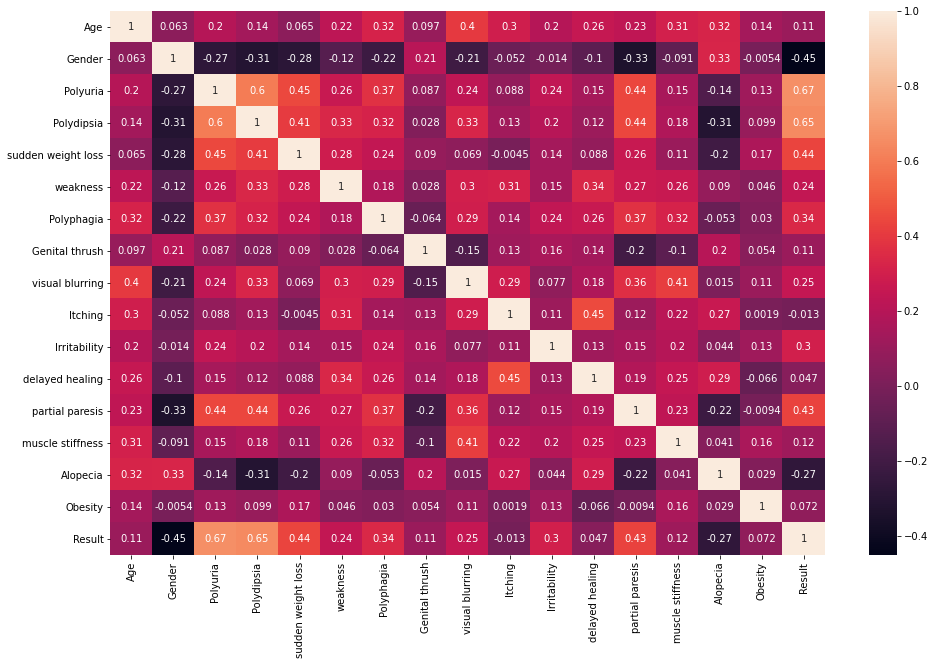

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='weakness', ylabel='count'>

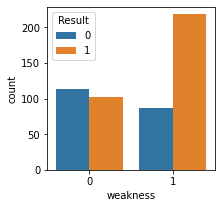

In [19]:
# weakness atrribute
plt.figure(figsize=(3,3))
sns.countplot(data['weakness'],hue=data['Result'])

<AxesSubplot:xlabel='sudden weight loss', ylabel='count'>

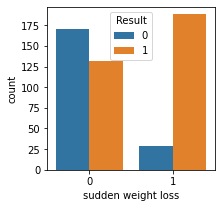

In [20]:
#Sudden weight loss
plt.figure(figsize=(3,3))
sns.countplot(data['sudden weight loss'],hue=data['Result'])

<AxesSubplot:xlabel='Obesity', ylabel='count'>

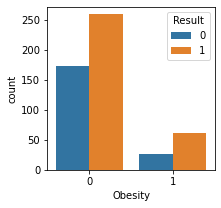

In [21]:
#Obesity
plt.figure(figsize=(3,3))
sns.countplot(data['Obesity'],hue=data['Result'])

In [25]:
X=data.drop('Result',axis=1)
Y=data['Result']

In [26]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Result, dtype: int64

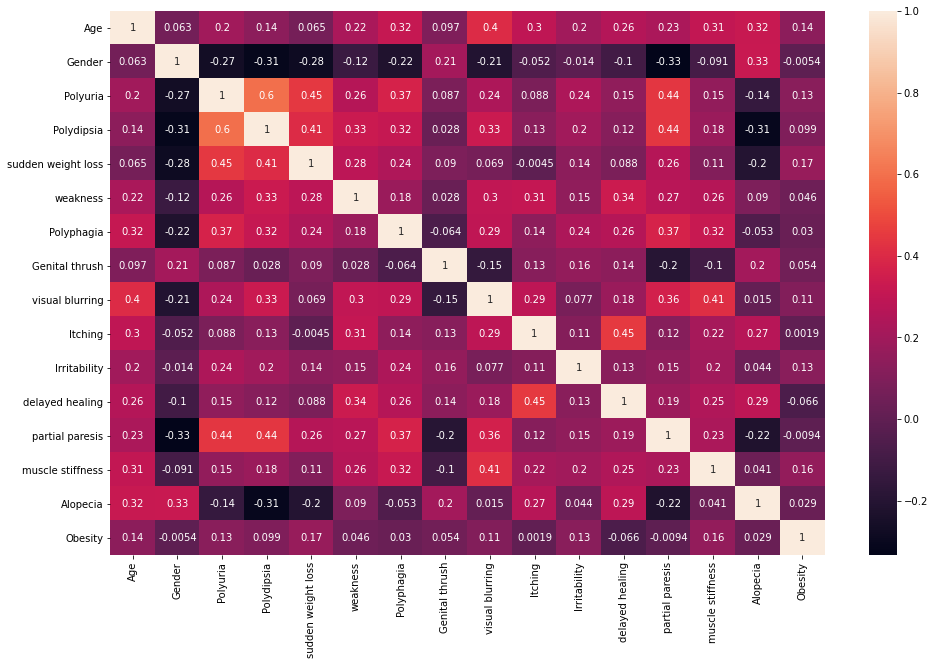

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(),annot=True)
plt.show()

In [35]:
# Feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X,Y)

In [36]:
data_scores = pd.DataFrame(fit.scores_)
data_cols = pd.DataFrame(X.columns)

In [40]:
featurescores = pd.concat([data_cols,data_scores],axis=1)
featurescores.columns=['columns','scores']

In [47]:
#top 10 Features
featurescores.sort_values('scores',ascending=False)[0:10]

,columns,scores
3,Polydipsia,120.785515
2,Polyuria,116.184593
4,sudden weight loss,57.749309
12,partial paresis,55.314286
1,Gender,38.747637
10,Irritability,35.334127
6,Polyphagia,33.198418
14,Alopecia,24.402793
0,Age,18.845767
8,visual blurring,18.124571


In [50]:
# with the following function we can select the highly corelated features
#it will remove the first feature that is correlated with anything

def corelated_features(data,threshold):
    col_corr=set()
    matrix=data.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i,j])>threshold:
                column=matrix.columns[i]
                col_corr.add(column)
    return col_corr

In [53]:
corelated_features(X,0.3)

{'Alopecia',
 'Itching',
 'Polydipsia',
 'Polyphagia',
 'delayed healing',
 'muscle stiffness',
 'partial paresis',
 'sudden weight loss',
 'visual blurring',
 'weakness'}

In [54]:
X =X[['Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Age','visual blurring']]

In [55]:
Y=data['Result']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#criteria
criterion=['gini','entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [98]:
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [73]:
random=RandomForestClassifier()

In [74]:
search_cv=RandomizedSearchCV(estimator = random, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, 
                             random_state=42, n_jobs = 1)

In [75]:
search_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini, total=   4.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini, total=   4.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini, total=   4.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_depth=20, criterion=gini, total=   4.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_depth=30, criterion=gini 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_depth=30, criterion=gini, total=   5.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_depth

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_depth=10, criterion=gini, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_depth=10, criterion=gini 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_depth=10, criterion=gini, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_depth=10, criterion=gini 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_depth=10, criterion=gini, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_depth=10, criterion=gini 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_depth=10, criterion=gini, total=   3.2s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_depth=5, criterion=entropy 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_depth=5, criterion=entropy, total=   3.3s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, m

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [76]:
search_cv.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 30,
 'criterion': 'gini'}

In [92]:
r=RandomForestClassifier(n_estimators=1100,criterion='gini',max_depth=30,min_samples_split=10,min_samples_leaf=2,max_features='auto',random_state=0)

In [94]:
r.fit(X_train,y_train)
predictions=r.predict(X_test)


<AxesSubplot:xlabel='Result', ylabel='Density'>

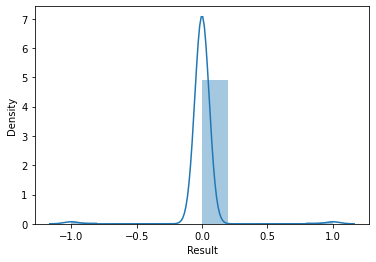

In [95]:
sns.distplot(y_test-predictions)

In [96]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=r, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 90.64 %
std is 3.76 %


In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix
ra=accuracy_score(predictions,y_test)
print(accuracy_score(predictions,y_test))
print(confusion_matrix(predictions,y_test))

0.9807692307692307
[[39  1]
 [ 1 63]]


In [103]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_classification.pkl', 'wb')

# dump information to that file
pickle.dump(r, file)